In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [24]:
df = pd.read_excel('/content/House_Pricing.xlsx', index_col=False)
df.head(5)

,Sales_ID,Sale Price,Property_ID,Street Number,Street Name,Unit,Area,First Price,Last Price,First Date,Close Date,Interior(Sq Ft,# of Bed,# of Bath,# of Rooms,Condo Fee,Tax,RC
0,2,125000,"2/239 Allston St,CP",239,Allston St,2,CP,127000,127000,1993-08-21,1993-10-22,850,2,1,5,100,923,1
1,3,95000,"3/83 Amory St,M",83,Amory St,3,M,123000,100000,1993-03-06,1993-09-30,730,2,1,4,185,575,0
2,4,189000,"3/43 Antrim St,M",43,Antrim St,3,M,194000,194000,1993-05-18,1993-08-06,1058,3,1,5,163,1682,0
3,5,202000,"3/95 Antrim St,M",95,Antrim St,3,M,245000,214900,1992-08-08,1993-01-15,1585,2,1,6,100,1402,1
4,6,206000,"1/107 Antrim St,M",107,Antrim St,1,M,219000,210000,1991-03-17,1991-08-23,1460,3,2,6,100,1582,1


In [25]:
X = df['Interior(Sq Ft']
y = df['Sale Price']

In [26]:
# Normalize the data (scaling features to a smaller range, e.g., between 0 and 1)
X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"No. of records in train_set: {len(X_train)}")
print(f"No. of records in test_set: {len(X_test)}")

No. of records in train_set: 333
No. of records in test_set: 84


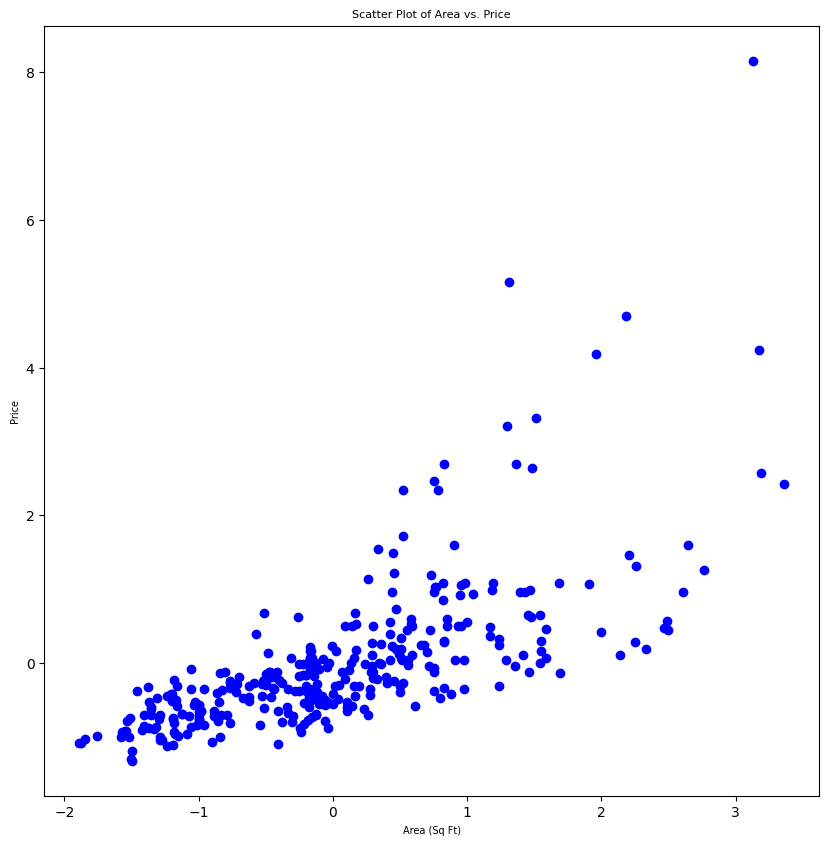

In [28]:
plt.figure(figsize=(10, 10))
plt.scatter(X_train, y_train, color='blue')

# Adding title and labels
plt.title('Scatter Plot of Area vs. Price', fontsize=8)
plt.xlabel('Area (Sq Ft)', fontsize=7)
plt.ylabel('Price', fontsize=7)

# Display the plot
plt.show()

1.   Calculate the slope (m) and intercept (c) using the least-squares formula.
2.   Use these values to create the best-fit line.
3.   Predict the target (y) based on the input (x).

**Formula Recap:**

*   Slope (m):

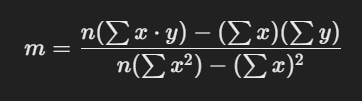

*   Intercept (c):

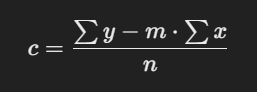



Slope (m): 0.6896167964393598
Intercept (c): -0.013745501006963767


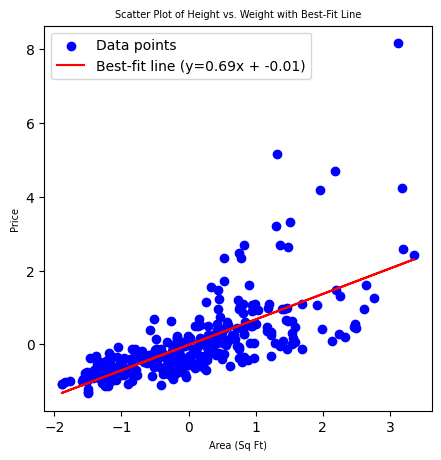

In [29]:
# Calculate the number of observations (n)
n = len(X_train)

# Calculate the slope (m) using the formula
m = (n * np.sum(X_train * y_train) - np.sum(X_train) * np.sum(y_train)) / (n * np.sum(X_train**2) - np.sum(X_train)**2)

# Calculate the intercept (c) using the formula
c = (np.sum(y_train) - m * np.sum(X_train)) / n

# Print slope and intercept
print(f"Slope (m): {m}")
print(f"Intercept (c): {c}")

# Make predictions (y = mx + c)
height_pred = m * X_train + c

# Plot the scatter plot and the best-fit line
plt.figure(figsize=(5, 5))
plt.scatter(X_train, y_train, color='blue', label='Data points')  # Scatter plot of original data
plt.plot(X_train, height_pred, color='red', label=f'Best-fit line (y={m:.2f}x + {c:.2f})')  # Best-fit line

# Adding title and labels
plt.title('Scatter Plot of Height vs. Weight with Best-Fit Line', fontsize=7)
plt.xlabel('Area (Sq Ft)', fontsize=7)
plt.ylabel('Price', fontsize=7)

# Add legend
plt.legend()

# Display the plot
plt.show()

In a full implementation of Linear Regression from scratch, we typically include a loss function (or cost function) and an optimization algorithm to iteratively minimize the loss, which is typically done using Gradient Descent.

The above implementation directly calculates the best-fit line using the closed-form solution of Linear Regression (the Least Squares method), which does not involve iterative optimization. In this approach, the slope (m) and intercept (c) are directly computed without a loss function or an optimization process.

Now, let’s modify the code to include:
1.   Loss Function: We'll use Mean Squared Error (MSE) to calculate how well our linear model fits the data. The MSE formula is:

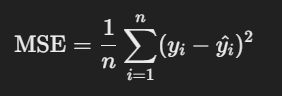

Where:
* image.png is thee actual value.
* 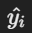 is the predicted value.


2.   Optimization: We will implement Gradient Descent to iteratively update the slope (m) and intercept (c) to minimize the loss. We iteratively adjust the slope (m) and intercept (c) to reduce the loss using these update rules:

* Update Rule for m (slope):
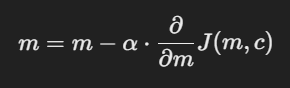

* Update Rule for c (intercept):

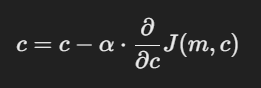

Where:
* image.png is the learning rate.
* J(m,c) is the loss function.


In [30]:
# Initialize parameters (slope m and intercept c)
m = 0  # initial slope
c = 0  # initial intercept
learning_rate = 0.001  # learning rate
epochs = 10000  # number of iterations
n = len(X_train)  # number of data points

# Mean Squared Error (MSE) - Loss function
def compute_mse(X, y, m, c):
    y_pred = m * X + c
    return np.sum((y - y_pred) ** 2) / n

# Gradient Descent optimization
for i in range(epochs):
    # Predicted height based on current m and c
    y_pred = m * X_train + c

    # Calculate gradients
    dm = (-2/n) * np.sum(X_train * (y_train - y_pred))  # partial derivative w.r.t m
    dc = (-2/n) * np.sum(y_train - y_pred)             # partial derivative w.r.t c

    # Update m and c using the gradient descent rule
    m = m - learning_rate * dm
    c = c - learning_rate * dc

    # Every 1000 iterations, print the loss to monitor progress
    if i % 1000 == 0:
        loss = compute_mse(X_train, y_train, m, c)
        print(f"Epoch {i}, Loss: {loss:.4f}, m: {m:.4f}, c: {c:.4f}")

# Final slope (m) and intercept (c) after training
print(f"Final slope (m): {m}")
print(f"Final intercept (c): {c}")

Epoch 0, Loss: 1.0412, m: 0.0015, c: 0.0000
Epoch 1000, Loss: 0.5493, m: 0.6061, c: -0.0056
Epoch 2000, Loss: 0.5420, m: 0.6794, c: -0.0119
Epoch 3000, Loss: 0.5419, m: 0.6884, c: -0.0134
Epoch 4000, Loss: 0.5419, m: 0.6895, c: -0.0137
Epoch 5000, Loss: 0.5419, m: 0.6896, c: -0.0137
Epoch 6000, Loss: 0.5419, m: 0.6896, c: -0.0137
Epoch 7000, Loss: 0.5419, m: 0.6896, c: -0.0137
Epoch 8000, Loss: 0.5419, m: 0.6896, c: -0.0137
Epoch 9000, Loss: 0.5419, m: 0.6896, c: -0.0137
Final slope (m): 0.6896167957830428
Final intercept (c): -0.013745500322988878


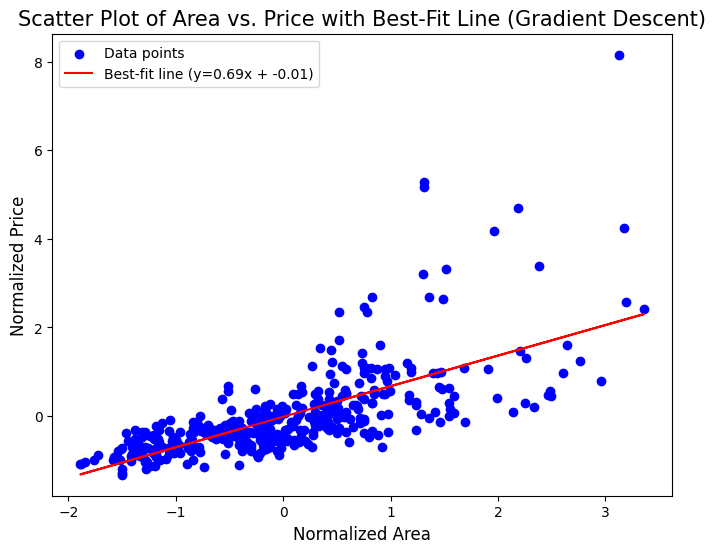

In [31]:
# Make predictions using the trained model
y_pred = m * X + c

# Plot the scatter plot and the best-fit line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data points')  # Scatter plot of original data
plt.plot(X, y_pred, color='red', label=f'Best-fit line (y={m:.2f}x + {c:.2f})')  # Best-fit line

# Adding title and labels
plt.title('Scatter Plot of Area vs. Price with Best-Fit Line (Gradient Descent)', fontsize=15)
plt.xlabel('Normalized Area', fontsize=12)
plt.ylabel('Normalized Price', fontsize=12)

# Add legend
plt.legend()

# Display the plot
plt.show()

n Python, the Scikit-learn library provides an easy-to-use implementation of Linear Regression. Scikit-learn is one of the most popular libraries for machine learning due to its simplicity, efficiency, and wide range of functionalities. Its LinearRegression class offers tools to quickly build, train, and evaluate linear models.

**Features of Linear Regression in Scikit-learn:**
1.   **Efficient Implementation:** Scikit-learn’s implementation is optimized for speed and efficiency, making it suitable for small to medium-sized datasets.
2. **No Manual Gradient Descent:** Unlike manual implementations, the LinearRegression class automatically finds the best-fit line using Ordinary Least Squares (OLS) without the need for iterative optimization techniques like gradient descent.
3.   **Easy Integration:** Scikit-learn integrates easily with other components of Python's data science ecosystem, including NumPy and Pandas for data handling, and Matplotlib or Seaborn for visualization.
4. **Multiple Features Support:** Scikit-learn’s Linear Regression can handle both simple linear regression (with one input feature) and multiple linear regression (with multiple input features).

**Key Steps to Implement Linear Regression in Scikit-learn**
1. **Import Necessary Libraries:** Scikit-learn provides the LinearRegression class, which is part of its linear_model module. It also includes train_test_split for splitting the dataset, and mean_squared_error for evaluating the model's performance.
2. **Load and Prepare the Data:** Before building the model, the data needs to be cleaned and prepared. Features are typically stored in a NumPy array or a Pandas DataFrame, while the target variable is stored in a separate array.
3. **Fit the Model:** After preparing the data, you can create an instance of the LinearRegression class and fit the model to the training data using the .fit() method.
4. **Make Predictions:** Once the model is trained, use the .predict() method to make predictions on new or test data.
5. **Evaluate the Model:** You can evaluate the performance of the model using metrics like Mean Squared Error (MSE), R-squared (R²), or Root Mean Squared Error (RMSE).
**Example Implementation in Scikit-learn:**

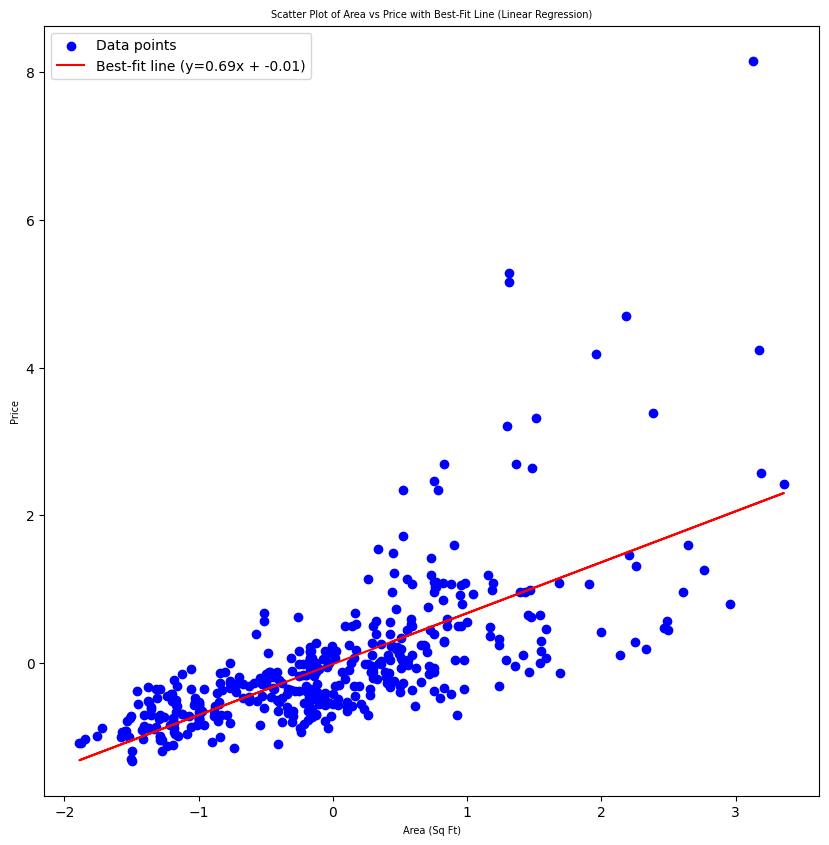

In [33]:
from sklearn.linear_model import LinearRegression

X_train = X_train.values.reshape(-1, 1)  # Feature (input variable)
y_train = y_train.values  # Target (output variable)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict height values using the model
X = X.values.reshape(-1, 1)
y_pred = model.predict(X)

# Scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(X, y, color='blue', label='Data points')

# Plot the best-fit line
plt.plot(X, y_pred, color='red', label=f'Best-fit line (y={model.coef_[0]:.2f}x + {model.intercept_:.2f})')

# Adding title and labels
plt.title('Scatter Plot of Area vs Price with Best-Fit Line (Linear Regression)', fontsize=7)
plt.xlabel('Area (Sq Ft)', fontsize=7)
plt.ylabel('Price', fontsize=7)

# Add legend
plt.legend()

# Display the plot
plt.show()